# Description
Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not. Which variables are most significant. Which segment of customers should be targeted more. Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import the necessary packages

In [ ]:
!pip install uszipcode

In [ ]:
 #this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

### Read the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
originaldata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LogisticRegression/Project3/Loan_Modelling.csv")

In [ ]:
# copying data to another varaible to avoid any changes to original data
loandf = originaldata.copy()

### View the first and last 5 rows of the dataset.

In [ ]:
loandf.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
loandf.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Understand the shape of the dataset.

In [ ]:
loandf.shape

(5000, 14)

* Dataset has 5000 rows and 14 columns.

### Check the data types of the columns for the dataset.

In [ ]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* All the columns are of numerical type and there are no null values.
* The ID column is not useful in this scenario, so we can drop it.
* ZIPCode, Family and Education can possibly be categorical values.

In [ ]:
# we do not need the ID column here, since it is not related to any of the columns, so this can be dropped
loandf.drop("ID", axis=1, inplace=True)

##Initial Data Analysis

### Check for missing values and duplicates

In [ ]:
loandf.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
loandf.duplicated().any()

False

* There are no missing values or duplicates in the data.

### Statistical summary for the dataset.

In [ ]:
# summary of numerical attributes
loandf.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


**Observations**
* ***Age*** is quantitative, range of people having bank account is from minimum age of 23 to Maimum age of 67.
* ***Experience*** is quantitative, it has some negative values, we have to do some data preprocessing to correct this data. Minimum experience is 0 which means no experience and maximum experience is 43 years.
* ***Income*** is quantitative, discrete range of values from minimum of 8K dollars to a maximum on 224K dollars, median income is around 64K dollars.
* ***Zipcode*** is qualitative, categorical data. Does not have any significance here, it will be more meanigful if we can determine the region for each zipcode and convert this into a categorical data.
* Customer's ***Family*** is categorical data, having a finite set of values. Size range is from 1 to 4.
* ***CCVAvg*** is quantitative, continuous variable havgin Min average spending on credit cards per month of zero dollars and maximum of 10K dollars.
* ***Education*** is qualitative, categorical data. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
* ***Mortgage*** is quantitative, continuous data,Q3 value is 101K dollars and maximum mortgage availed is 635K dollars.
* ***Personal_Loan*** - **target variable**, it is qualitative, binary(0/1), categorical data. If the customer had accepted the personal loan offered in the last campaign then 1 else 0.
* ***Securities_Account*** it is qualitative, binary(0/1), categorical data. If the customer has securities account in AllLife bank then 1 else 0.
* ***CD_Account*** it is qualitative, binary(0/1), categorical data. If the customer has certificate of deposit (CD) account in AllLife bank then 1 else 0.
* ***Online*** it is qualitative, binary(0/1), categorical data. If the customer uses internet banking facility provided by in AllLife bank then 1 else 0.
* ***CreditCard*** it is qualitative, binary(0/1), categorical data. If the customer holds a credit card issued by any other bank other than AllLife bank then 1 else 0.




In [ ]:
# Checking the distribution of target variable
display(loandf['Personal_Loan'].value_counts(), loandf['Personal_Loan'].value_counts(normalize = True)*100)

0    4520
1     480
Name: Personal_Loan, dtype: int64

0    90.4
1     9.6
Name: Personal_Loan, dtype: float64

90.4% of customers have not accepted a personal loan in the previous campaign, while only 9.6% of them have accepted a personal loan with AllLife bank in the previous campaign.

# Data Pre-processing

#### Functions for visualization charts

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Treating negative values in Experience column

In [ ]:
# loandf[loandf.Experience == 0]
loandf.loc[loandf['Experience'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIPCode,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal_Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0
Securities_Account,52.0,0.115385,0.322603,0.0,0.00,0.0,0.000,1.0


#### Experience data before imputation

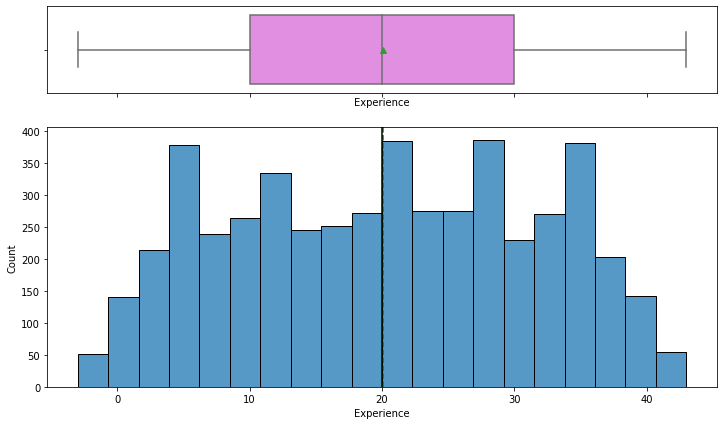

In [ ]:
histogram_boxplot(loandf, "Experience")

####Imputation on Experience column

Convert the negative values into positive by multiplying the negative values with -1

In [ ]:
loandf.loc[(loandf.Experience < 0),['Experience']] = loandf.Experience * -1
loandf.loc[loandf['Experience'] < 0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


### Experience after imputation

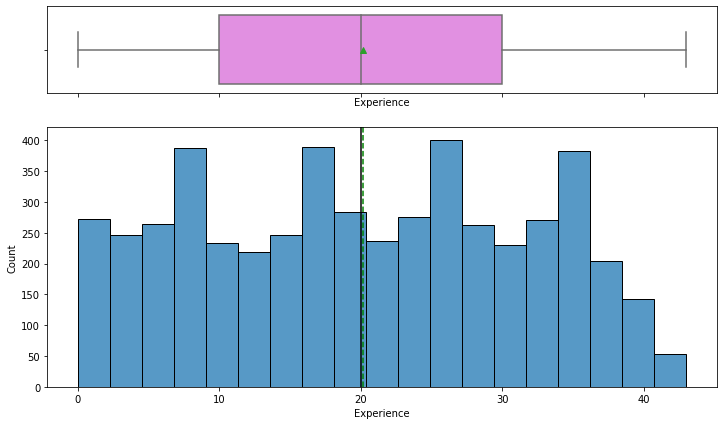

In [ ]:
histogram_boxplot(loandf, "Experience")

There is no major difference in the Experience column before and after, treating negative values. However its good to eliminate negative values.

###Add categorical column for Education

In [ ]:
#Add another column for experience and make it a categorical value
loandf['EducationDesc'] = ''
loandf.loc[(loandf.Education == 0),['EducationDesc']] = 'HighSchool'
loandf.loc[(loandf.Education == 1),['EducationDesc']] = 'Undergrad'
loandf.loc[(loandf.Education == 2),['EducationDesc']] = 'Grad'
loandf.loc[(loandf.Education == 3),['EducationDesc']] = 'Professional'

###Add categorical column for Family

In [ ]:
#Add another column for experience and make it a categorical value
loandf['FamilySize'] = ''
loandf.loc[(loandf.Family == 1),['FamilySize']] = 'Family 1'
loandf.loc[(loandf.Family == 2),['FamilySize']] = 'Family 2'
loandf.loc[(loandf.Family == 3),['FamilySize']] = 'Family 3'
loandf.loc[(loandf.Family == 4),['FamilySize']] = 'Family 4'
loandf.head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,EducationDesc,FamilySize
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Undergrad,Family 4
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Undergrad,Family 3
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Undergrad,Family 1
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,Grad,Family 1
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Grad,Family 4
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,Grad,Family 4
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,Grad,Family 2
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,Professional,Family 1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,Grad,Family 3
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,Professional,Family 1


### ZIPCode - Find the City and County for the ZIPCodes

In [ ]:
from uszipcode import SearchEngine
search = SearchEngine()

In [ ]:
loandf['City'] = ""
loandf['County'] = ""
loandf['CountyNumber'] = 0

In [ ]:
zipcodelist = loandf['ZIPCode'].unique()
for  zipcode in zipcodelist:
  city = search.by_zipcode(zipcode)
  loandf.loc[(loandf.ZIPCode == zipcode),['City']] = 'sfo'
  loandf.loc[(loandf.ZIPCode == zipcode),['County']] = 'sfoc'

Exception ignored in: <function SearchEngine.__del__ at 0x7f5786ef8a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.7/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1786, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 1828, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/orm/session.py", line 923, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2318, in close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2534, in _do_close
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2520, in _close_impl
  File "/usr/local/lib/python3.7/dist-packages/sqlalchemy/engine/base.py", line 2512, in _connection_rollback_impl
  File "/usr/lo

In [ ]:
countyNumber=0
countyList = loandf['County'].unique()
for county in countyList:
  countyNumber = countyNumber + 1
  loandf.loc[(loandf.County == county),['CountyNumber']] = countyNumber
loandf.County.isna().sum()

0

In [ ]:
tempdf = loandf[(loandf.CountyNumber == 0)]
tempdf.ZIPCode.unique()

array([], dtype=int64)

92717, 93077, 92634, 96651 are not valid US ZipCodes, so we can delete these records.

In [ ]:
#Drop city and County Number
loandf.drop(['City','CountyNumber'], axis=1, inplace=True)

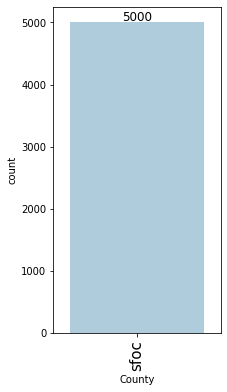

In [ ]:
labeled_barplot(loandf, "County")

### Treat Mortgage Column

Convert Mortgage column into categorical value by grouping them using the range of Mortgage values taken

In [ ]:
loandf.Mortgage.unique()
loandf['MortgageCat'] = ''
loandf.loc[(loandf.Mortgage == 0),['MortgageCat']] = 'No Mortgage'
loandf.loc[((loandf.Mortgage > 0) & (loandf.Mortgage < 100)),['MortgageCat']] = '100K'
loandf.loc[(loandf.Mortgage >= 100) & (loandf.Mortgage < 200),['MortgageCat']] = '200k'
loandf.loc[(loandf.Mortgage >= 200) & (loandf.Mortgage < 400),['MortgageCat']] = '400K'
loandf.loc[(loandf.Mortgage >= 400) & (loandf.Mortgage < 600),['MortgageCat']] = '600K'
loandf.loc[(loandf.Mortgage >= 600),['MortgageCat']] = 'Above 600K'

## Binning on Age

In [ ]:
loandf['Agebin'] = pd.cut(loandf['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

## Summary of the numerical/continuous variables data

In [ ]:
loandfContinuous = loandf.filter(["Age","Experience","Income","Mortgage","CCVAvg"],axis=1)
loandfContinuous.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1346,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0


**Observations**

- Mean value for the age column is approx 45 and the median is also 45.Minimum age is 23 and Maximum age is 67. Majority of the customers are in the age group between 30 and 55 years.
- Mean income is around 74K dollars and median income range is around 64K dollars.
- There are some customers with no work experience, minimum experience is 0 and maximum experience is 43 years.
- Maimum Mortgage is around 635K dollars. 

In [ ]:
# Making a list of all catrgorical variables
cat_col = [
    "Family",
    "Education",
    "Online",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "CreditCard",
    "County",
    "MortgageCat",
    "Agebin"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(loandf[column].value_counts())
    print("-" * 40)

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
----------------------------------------
1    2096
3    1501
2    1403
Name: Education, dtype: int64
----------------------------------------
1    2984
0    2016
Name: Online, dtype: int64
----------------------------------------
0    4520
1     480
Name: Personal_Loan, dtype: int64
----------------------------------------
0    4478
1     522
Name: Securities_Account, dtype: int64
----------------------------------------
0    4698
1     302
Name: CD_Account, dtype: int64
----------------------------------------
0    3530
1    1470
Name: CreditCard, dtype: int64
----------------------------------------
sfoc    5000
Name: County, dtype: int64
----------------------------------------
No Mortgage    3462
200k            766
400K            426
100K            270
600K             72
Above 600K        4
Name: MortgageCat, dtype: int64
----------------------------------------
51-60     1323
41-50     1270
31-40     1236
18-30

**Observations:**
- FamilyType and Education seem to be fairly equally distribution of people  amoung different category.
- More than 50% of the people seem to be using internet banking.
- Very few people ie, < 10% are using CD_Account, Securities_Account.
- Very few people ie, about 9% only have a personal loan.
- More than 50% of the people do not have a credit card.
- ZipCode data is highly distributed largely across different regions possibly within the same state, from the previous interpretation the min value of zipcode is 90005 and 96651.
This lies within the range of Zip code values for the state of California which is from 90001 to 96162.
- Converting ZIPCode data to county seems to give a meaningful data.
- Most of the customers are in the age group 30 to 60, there seems to be an equal distribution in the age groups 51-60,41-50 and 31-40.


# Univariate analysis

## Observations on Age

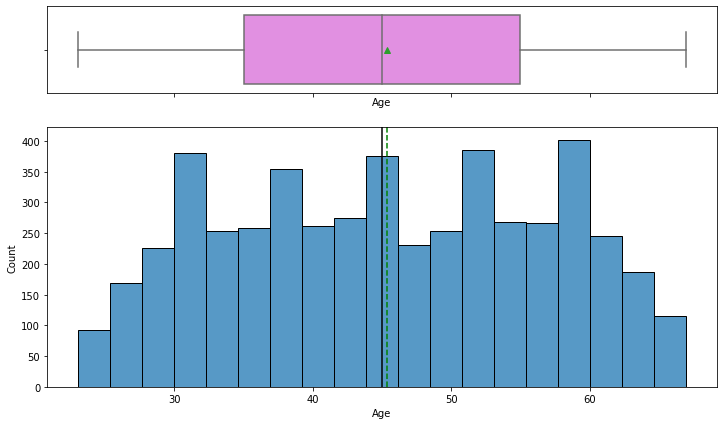

In [ ]:
histogram_boxplot(loandf, "Age")

* The distribution of Age seemed to be equally distributed between below 45 years and above 45 years.
* There are no outliers in this variable.
* From boxplot we can see that the mean and median are almost equal to 45 years.

## Observations on Experience

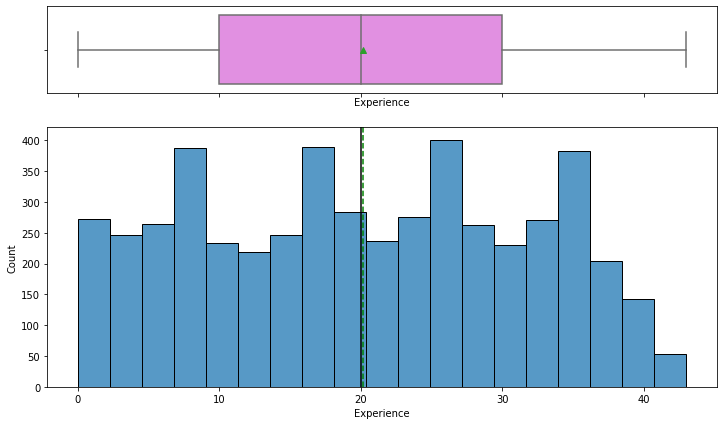

In [ ]:
histogram_boxplot(loandf, "Experience")

* Mean and Median experience for customers 19 years.
* There are a no outliers in this data.
* The distribution is equal on both the sides.

## Observations on Income

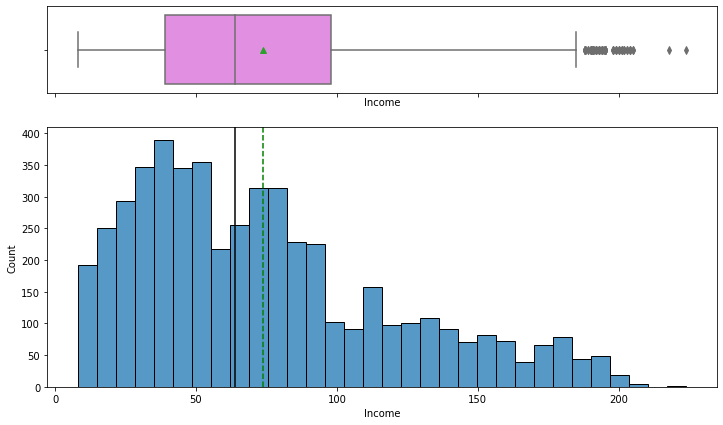

In [ ]:
histogram_boxplot(loandf, "Income")

* The median income is around 64K dollars and mean income is around 74K dollars. Most of the customers are in the income range 8K to 98K dollars. Rest of them seem to be outliers.
* Income data is more skewed to the right. There are more outliers in this data.


## Observations on Zipcode

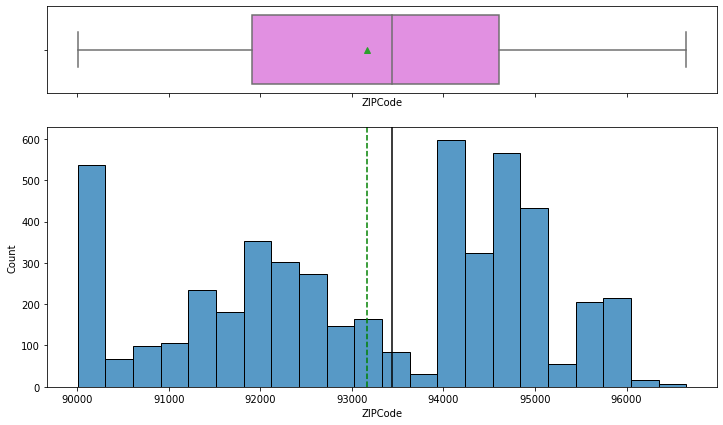

In [ ]:
histogram_boxplot(loandf, "ZIPCode")

* The distribution for ZIPCode is quite scattered, let us check the County data and see if we can make some interpretation.

## Observations on County

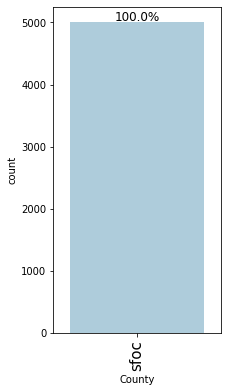

In [ ]:
labeled_barplot(loandf, "County", perc=True)

There are more customers from Los Angeles, San Diego, Santa Clara and Almanda Counties.

## Observations on Family

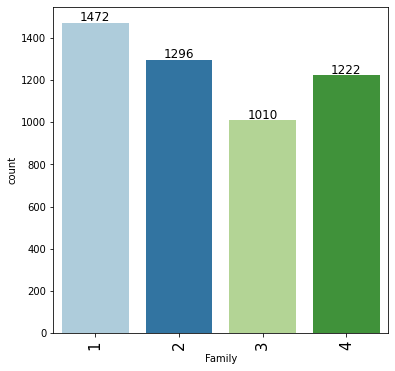

In [ ]:
labeled_barplot(loandf, "Family")

* The data seem to be fairly distributed over different family sizes.
* Customers with family size 1 can be considered single.

## Observations on CCAvg

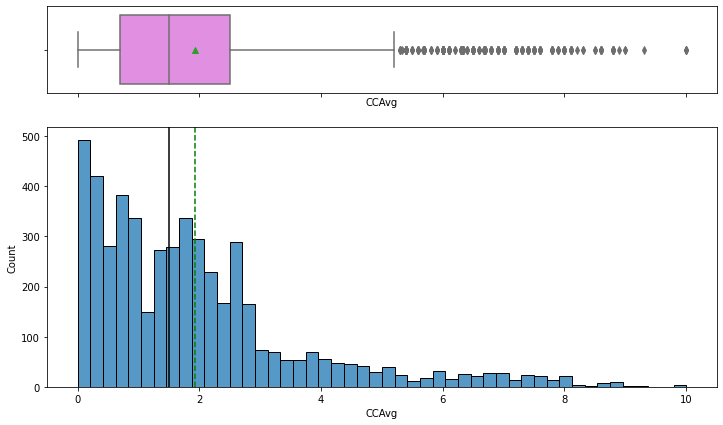

In [ ]:
histogram_boxplot(loandf, "CCAvg")

* The data is more skewed to the right, the mean spending of 1.9K dollars and and a median credit card speding of 1.5K dollars.
* There are many outliers in this data.
* There are fewer people who spend more than 4K dollars using the credit card.

## Observations on Education

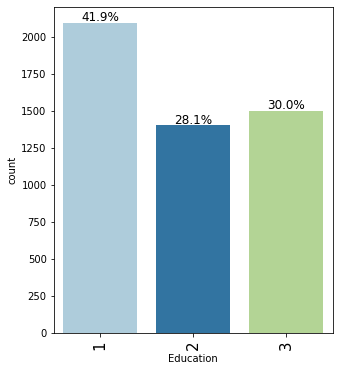

In [ ]:
labeled_barplot(loandf, "Education", perc=True)

* 41.9% of the customers have done Undergrad.
* 28.1% of the customers are Graduate.
* 30% of them Advanced/Professional education.

## Observations on Mortgage

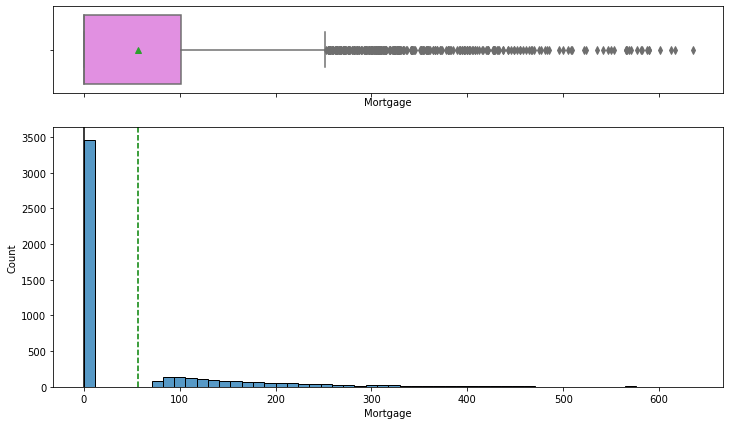

In [ ]:
histogram_boxplot(loandf, "Mortgage")

In [ ]:
loandf.Mortgage.unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

* Most of the customers have not taken Mortgage, there are lot of outliers in the Mortgage data. Let us examine MortgageCategory and see how the distribution looks like.

## Observations on MortgageCat

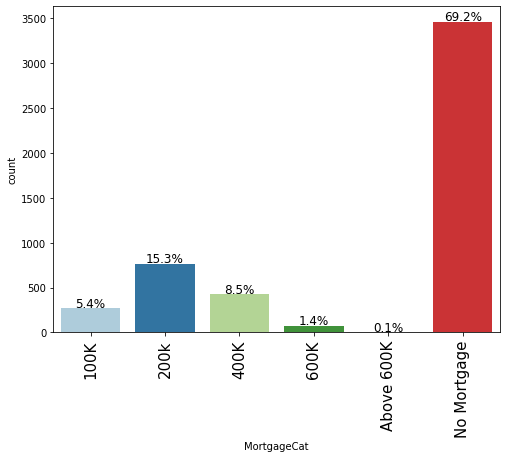

In [ ]:
labeled_barplot(loandf, "MortgageCat", perc=True)

* About 69.2% of customers do not have a Mortgage.
* 15.4% of customers have a Mortgage between 100K and 200K.
* 5.5% of customers have a Mortgage less than 100K.
* 8.5% of customers have Mortgage between 200K and 400K.
* 1.4% of customers have Mortgage between 400K and 6600K.
* Customers who have Mortgage above 600K is very negligible, about 0.1%

## Observations on Personal_Loan

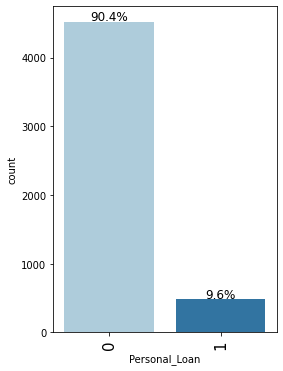

In [ ]:
labeled_barplot(loandf, "Personal_Loan", perc=True)

* 90.4% of the customers do not have a personal loan and only 9.6% of them have a personal loan from the previous campaign.

## Observations on Securities_Account


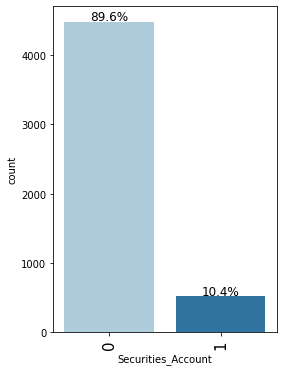

In [ ]:
labeled_barplot(loandf, "Securities_Account", perc=True)

* 89.6% of customers do not have a Securities_Account and only 10.4% of them have Securities_Account.

## Observations on CD_Account


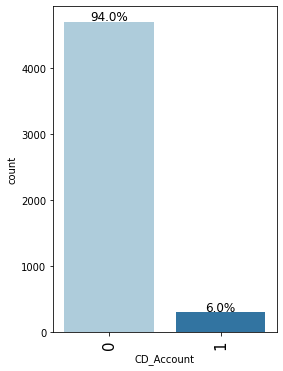

In [ ]:
labeled_barplot(loandf, "CD_Account", perc=True)

* 94.0% of customers do not have a CD_Account and only 6.0% of them have Securities_Account.

## Observations on Online


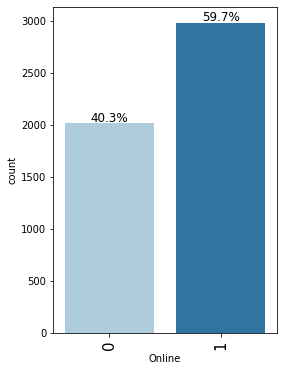

In [ ]:
labeled_barplot(loandf, "Online", perc=True)

* About 59.7% of the customers seem to be using online/internt banking while 40.3% of them don't seem to be using online banking.

## Observations on CreditCard


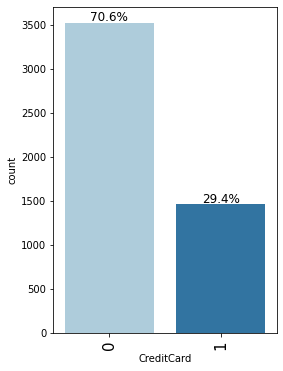

In [ ]:
labeled_barplot(loandf, "CreditCard", perc=True)

* 70.6% of customers do not have credit card from other bank (other than AllLife bank) where as 29.4% of customers hold credit card from other bank.

# Bivariate Analysis

###Correlation Matrix

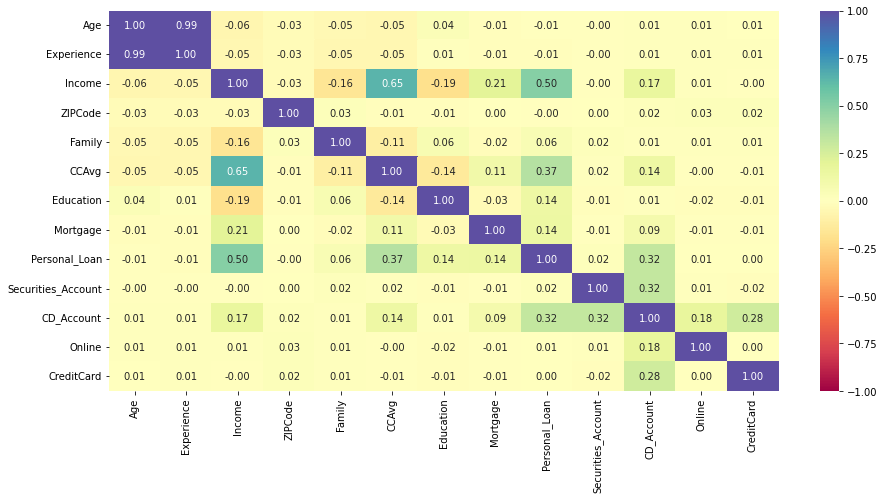

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(loandf.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**
* **Age and Experience** are highly correlated with each other but they are negatively correlated with Personal_Loan, similarly with other columns. 
* **Income** has a positive correlation with CCAvg and Personal_Loan, people who have more income spend more using credit card and more likely to accept a personal loan.
* **ZIPCode** has a negative correlation with Personal_Loan and very slight positive correlation with CDAccount, Online,CreditCard and family.
* **Family** size is very slightly correlated with Personal_Loan and Education. Does not show a strong correlation with any of the fields.
* Customers who have a **CD_Account, SecuritiesAccount** with AllLife Bank and outside bank's credit card other than AllLife bank are likely to accept a personal loan.
* Customers having **CD_Account** are the only ones who are using **Online** (Internet) banking.

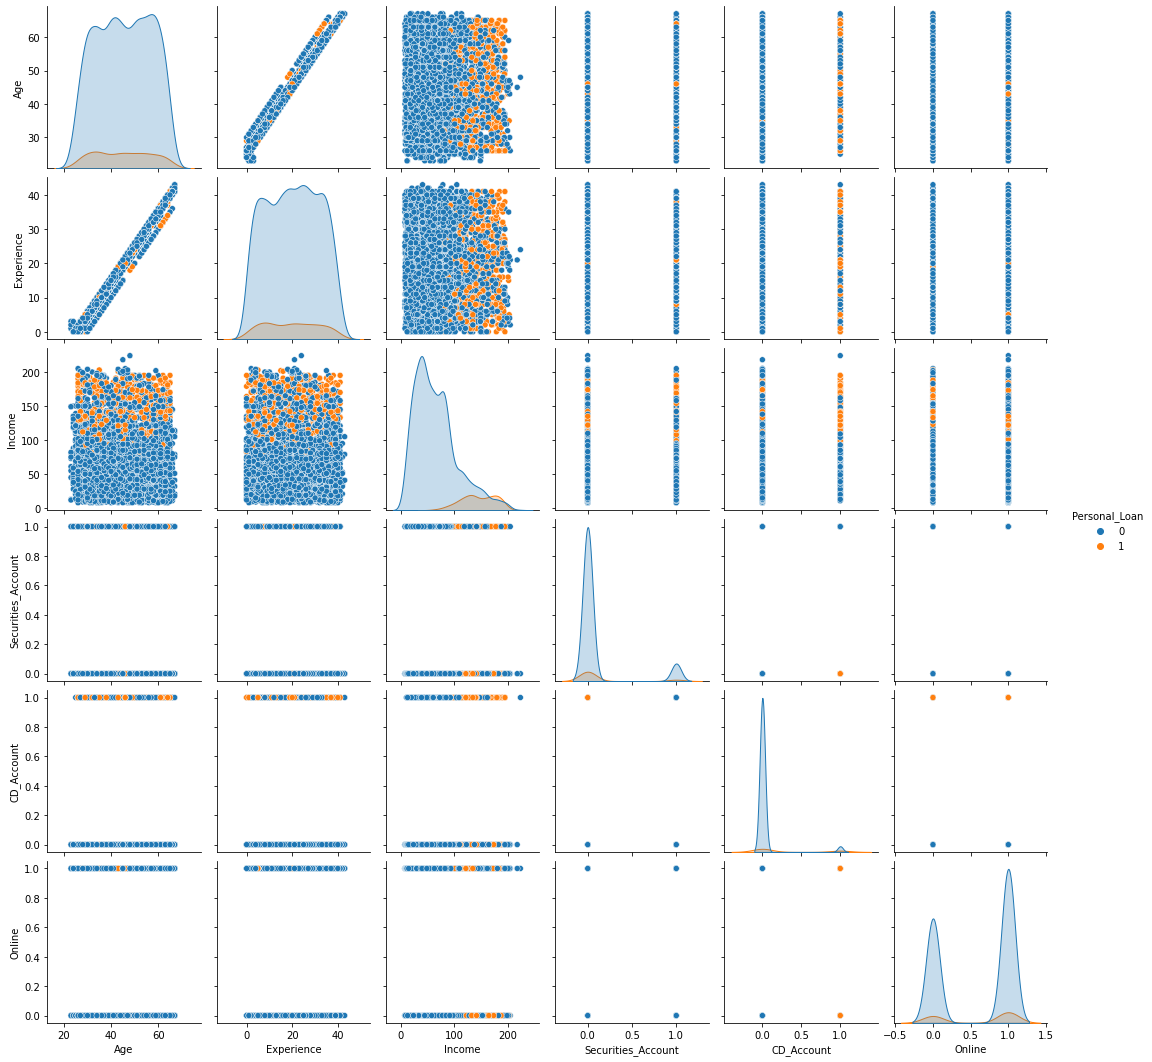

In [ ]:
sns.pairplot(data=loandf[['Age','Experience','EducationDesc','Income','County','FamilySize','MortgageCat','Securities_Account','CD_Account','Online','Personal_Loan']],hue="Personal_Loan", diag_kind="kde")
plt.show()

* Data is kind of scattered.

### Functions to plot charts

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Personal_Loan vs Age

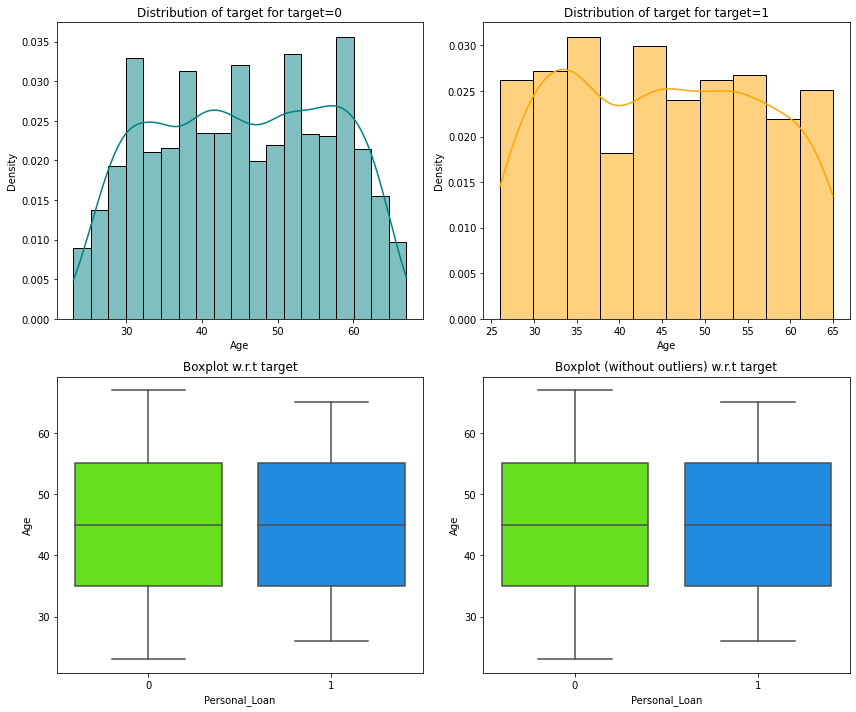

In [ ]:
distribution_plot_wrt_target(loandf, "Age", "Personal_Loan")

- We can see that most of the customers are in the age group between 35 and 55, people who bought personal loan and those who don't have personal loan are in the same age range, hence the distribution is equal in this data.

### Personal_Loan Vs Agebin

Personal_Loan     0    1   All
Agebin                        
All            4520  480  5000
41-50          1148  122  1270
31-40          1118  118  1236
51-60          1208  115  1323
18-30           558   66   624
60-100          488   59   547
------------------------------------------------------------------------------------------------------------------------


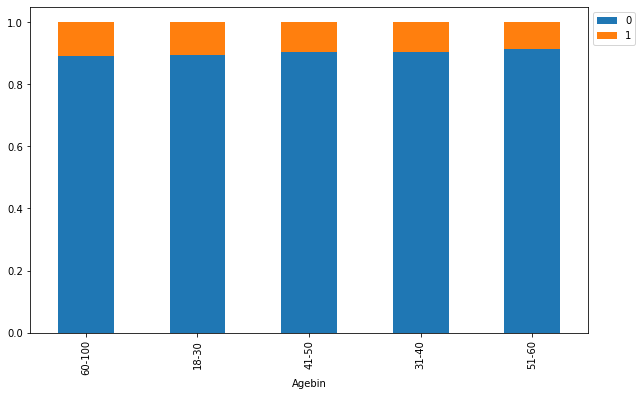

In [ ]:
stacked_barplot(loandf, "Agebin", "Personal_Loan")

The distribution seems to be fairly equal amoung different age groups with more peple availing personal loan in the age range 18-30 and above 60 years.

### Personal_Loan vs Experience

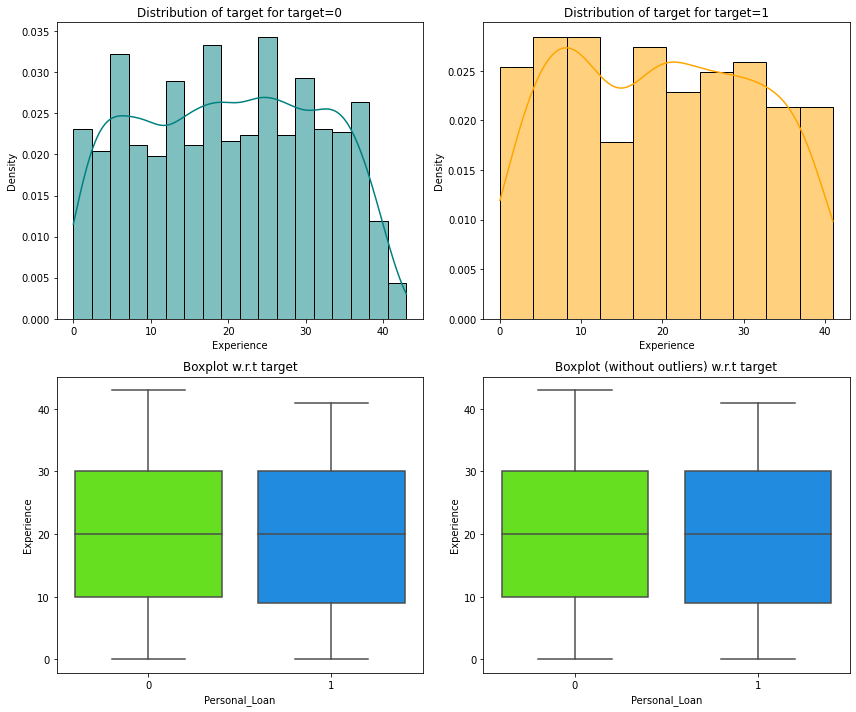

In [ ]:
distribution_plot_wrt_target(loandf, "Experience", "Personal_Loan")

- We can see that most of the customers have Experience between 10 to 30 years,the distribution is equal in this data.

### Personal_Loan vs Income

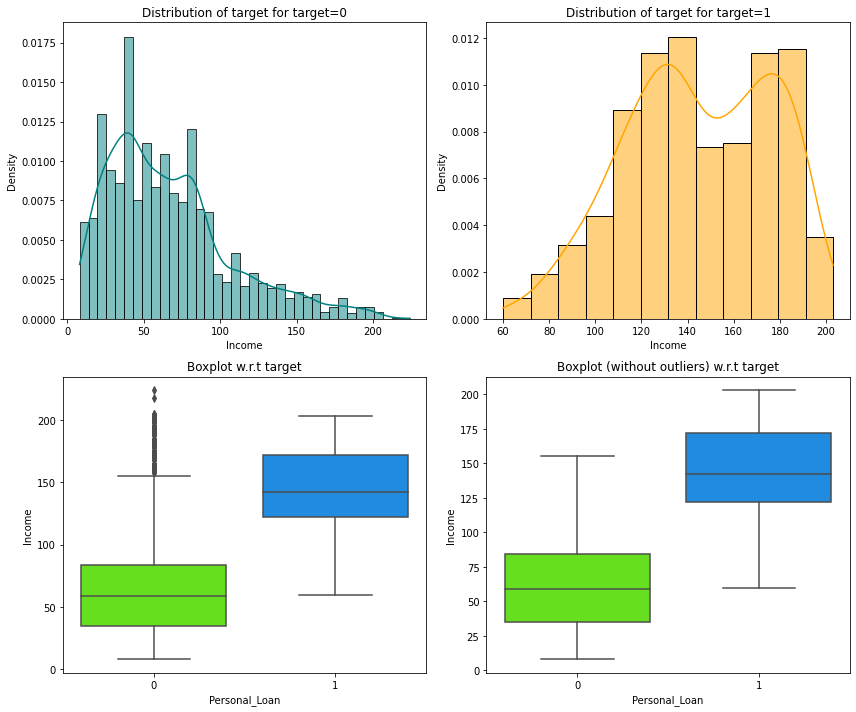

In [ ]:
distribution_plot_wrt_target(loandf, "Income", "Personal_Loan")

Text(0.5, 1.0, 'Distribution of Income by Personal Loan')

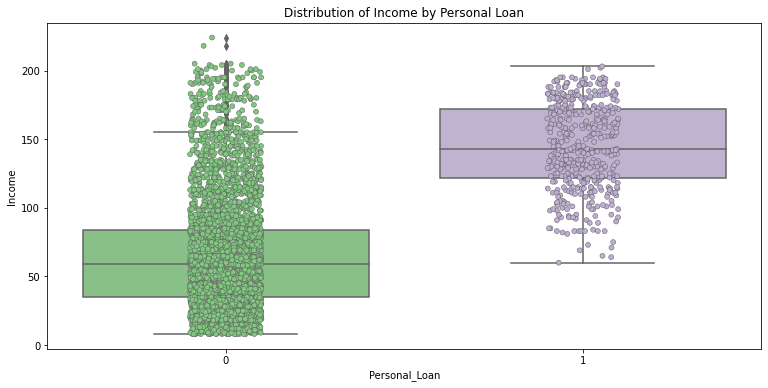

In [ ]:
# Distribution of Income by Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal_Loan', y = 'Income', palette = 'Accent', data = loandf)
ax = sns.stripplot(x = 'Personal_Loan', y = 'Income', palette = 'Accent', data = loandf, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Income by Personal Loan')

- We can see that the second and third quartiles of people buying personal loan is much more than the second and third quartiles of those who did not buy.
- This shows that customers with high Income are more likely to buy a personal loan.

### Personal_Loan vs ZIPCode

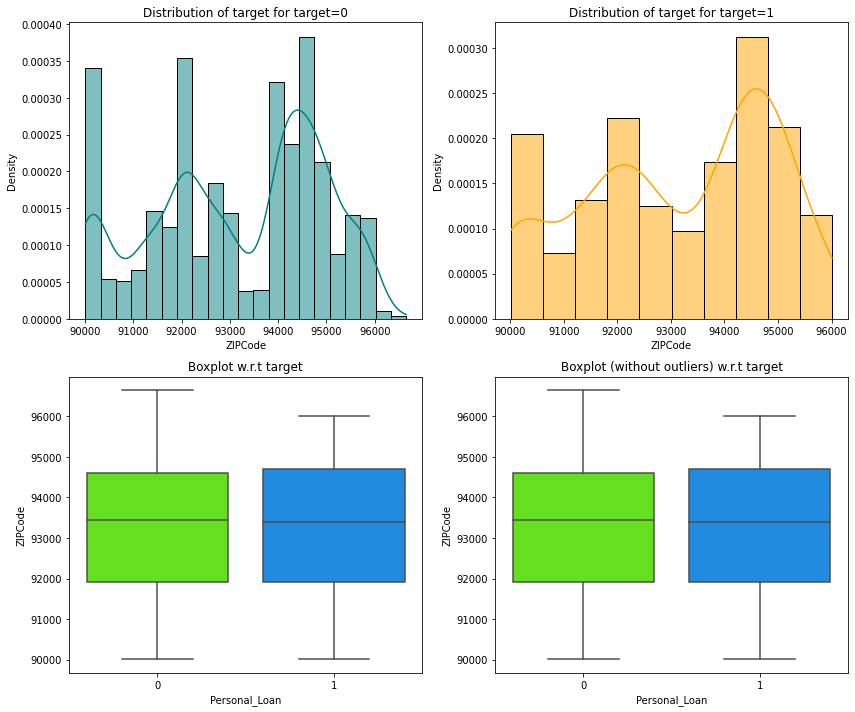

In [ ]:
distribution_plot_wrt_target(loandf, "ZIPCode", "Personal_Loan")

- People living in certain zipcodes have higher chances of buying a personal loan.

### Personal_Loan Vs County

Personal_Loan     0    1   All
County                        
sfoc           4520  480  5000
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


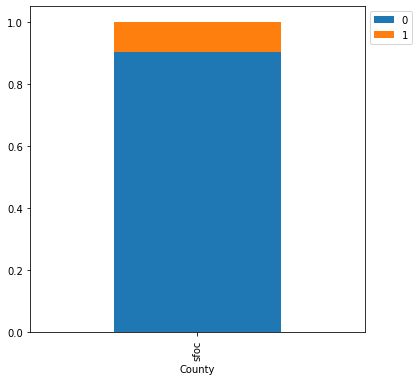

In [ ]:
stacked_barplot(loandf, "County", "Personal_Loan")

People living in Sanoma, Shasta, San Luis, Contra counties are more likely to buy a personal loan when compared to customers living in other counties.

### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


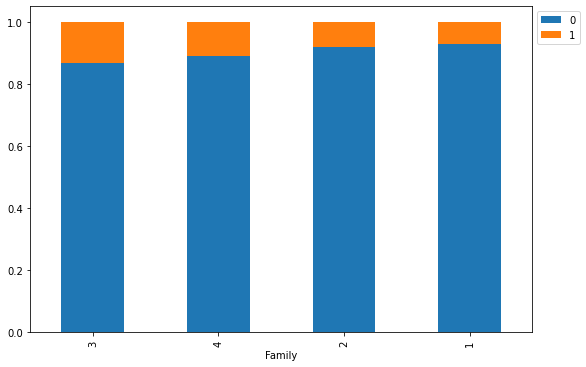

In [ ]:
stacked_barplot(loandf, "Family", "Personal_Loan")

* Customers with family size of 3 and above are more likely to buy a personal loan.

### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


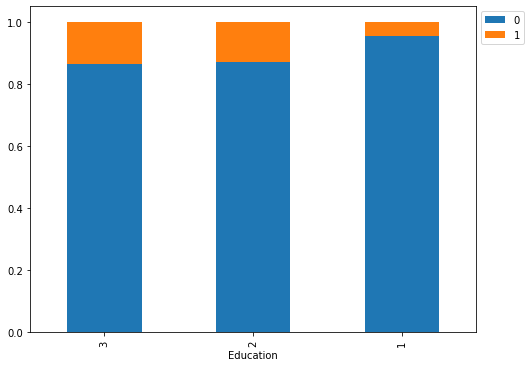

In [ ]:
stacked_barplot(loandf, "Education", "Personal_Loan")

- Most of the customers who have Advanced/Professional and Grad degree have availed the personal loan.
- Whereas the customers who are undergrad are comparitively less in availing the personal loan.

### Personal_Loan vs Securities account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


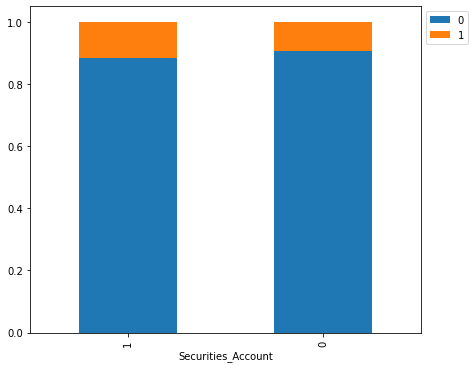

In [ ]:
stacked_barplot(loandf, "Securities_Account", "Personal_Loan")

* Customers who have securities account are little aligned towards buying a personal loan. In this case the difference is very little.

### Personal_Loan vs MortgageCat

Personal_Loan     0    1   All
MortgageCat                   
All            4520  480  5000
No Mortgage    3150  312  3462
400K            348   78   426
200k            727   39   766
600K             36   36    72
100K            257   13   270
Above 600K        2    2     4
------------------------------------------------------------------------------------------------------------------------


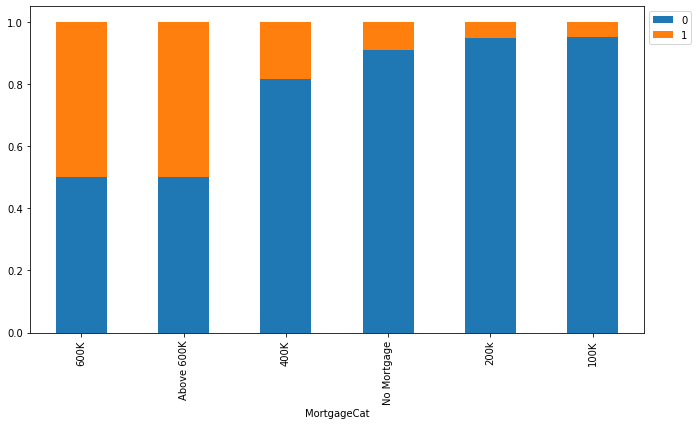

In [ ]:
stacked_barplot(loandf, "MortgageCat", "Personal_Loan")

* More customers who have Mortgage above 400K have taken the personal loan.
* Rest of them who take personal loan are very minimal.

### Personal_Account vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


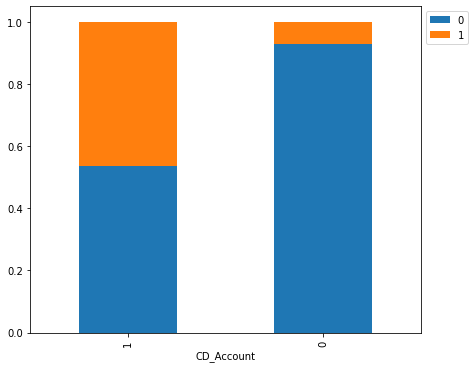

In [ ]:
stacked_barplot(loandf, "CD_Account", "Personal_Loan")

* Customers who have CD_Account are more likely to buy a personal loan.

### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


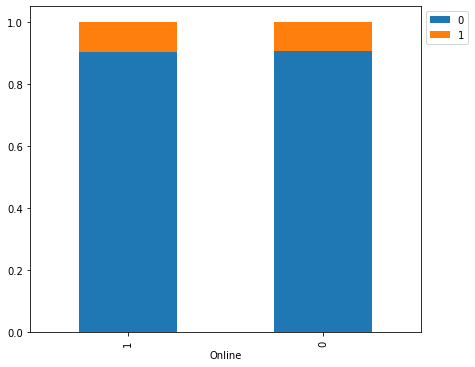

In [ ]:
stacked_barplot(loandf, "Online", "Personal_Loan")

- Customers who have online banking and have personal loan are similar to those who do not use online banking, the difference is very minimal.

### Customer-Level Analysis

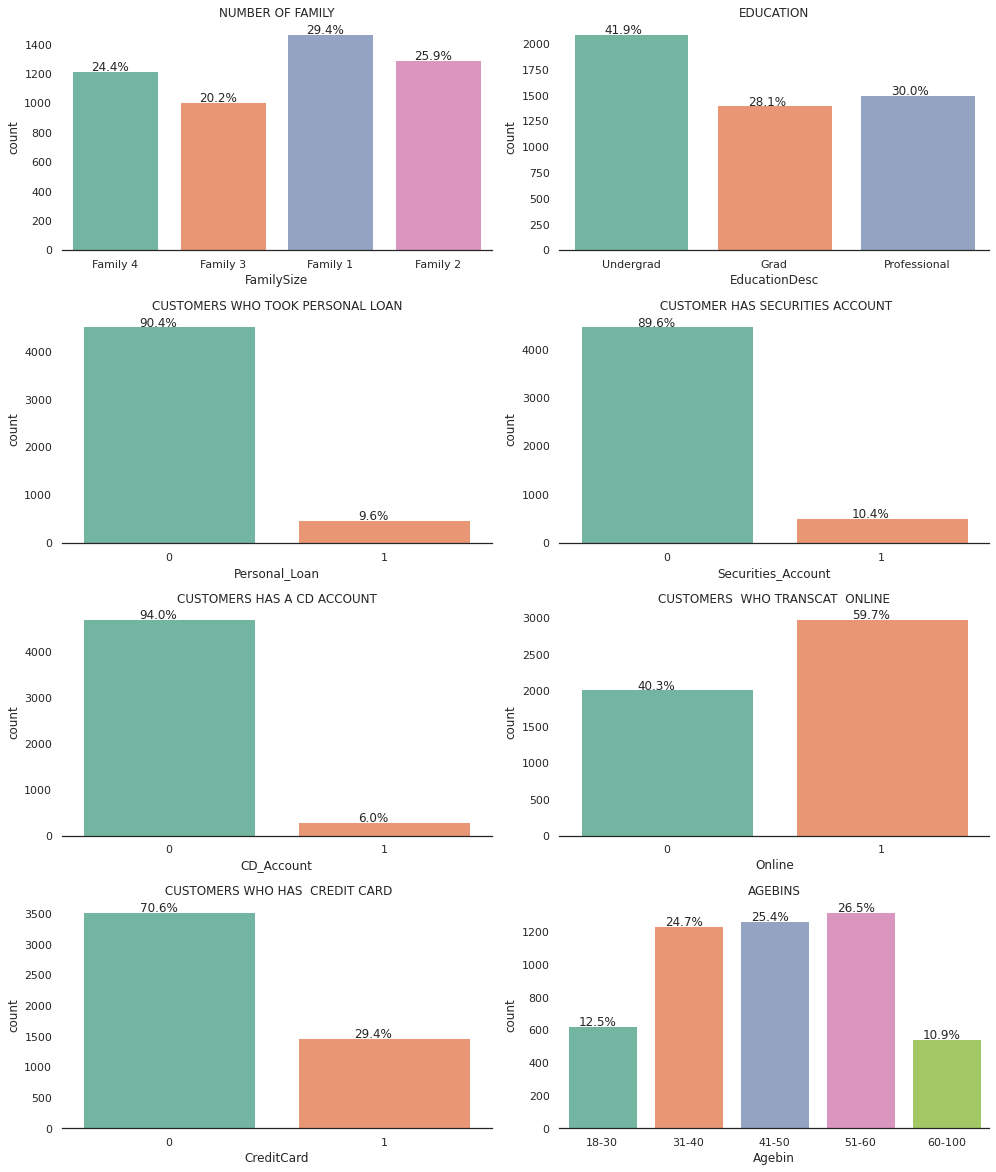

In [ ]:
# Making a list of all categorical variables
cat_columns = ['FamilySize','EducationDesc','Personal_Loan','Securities_Account',
               'CD_Account','Online','CreditCard','Agebin']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") 
for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = loandf[variable].value_counts(ascending=False).index   
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=loandf[variable], data=loandf)
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(loandf[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())
                                     

**Observations**

* ~29.4 % customers are single.
* ~40% customers are undergrad.
* ~9.6% bought a personal loan from the bank.
* ~10.4 % customers have a securities account with the bank
* ~6.1 % customer have a CD account.
* ~60% customers use internet banking.
* 29.4% customers have credit cards.
* ~ 75 % of customers are in range of 31- 60.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

- There are no duplicate values in the dataset.
- There are no missing values in the data.
- Most of the data-types are either **int64** or **float64**.
- Experience had negative values and treated by converting them to positive values
- Zipcode, Education, Family, Age were all converted into categorical columns.


**Observations from EDA:**

* ***Age*** is quantitative, range of people having bank account is from minimum age of 23 to Maimum age of 67.
* ***Experience*** is quantitative, it has some negative values, we have to do some data preprocessing to correct this data. Minimum experience is 0 which means no experience and maximum experience is 43 years.
* ***Income*** is quantitative, discrete range of values from minimum of 8K dollars to a maximum on 224K dollars, median income is around 64K dollars.
* ***Zipcode*** is qualitative, categorical data. Does not have any significance here, it will be more meanigful if we can determine the region for each zipcode and convert this into a categorical data. People living in Sanoma, Shasta, San Luis, Contra counties are more likely to buy a personal loan when compared to customers living in other counties.
* Customer's ***Family*** is categorical data, having a finite set of values. Size range is from 1 to 4.
* ***CCVAvg*** is quantitative, continuous variable havgin Min average spending on credit cards per month of zero dollars and maximum of 10K dollars.
* ***Education*** is qualitative, categorical data. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
* ***Mortgage*** is quantitative, continuous data,Q3 value is 101K dollars and maximum mortgage availed is 635K dollars.
* ***Personal_Loan*** - **target variable**, it is qualitative, binary(0/1), categorical data. If the customer had accepted the personal loan offered in the last campaign then 1 else 0.
* ***Securities_Account*** it is qualitative, binary(0/1), categorical data. If the customer has securities account in AllLife bank then 1 else 0.
* ***CD_Account*** it is qualitative, binary(0/1), categorical data. If the customer has certificate of deposit (CD) account in AllLife bank then 1 else 0.
* ***Online*** it is qualitative, binary(0/1), categorical data. If the customer uses internet banking facility provided by in AllLife bank then 1 else 0.
* ***CreditCard*** it is qualitative, binary(0/1), categorical data. If the customer holds a credit card issued by any other bank other than AllLife bank then 1 else 0.

#Logistic Regression

### Model evaluation criterion

### Model can make wrong predictions as:
 
1. Predicting a customer will not buy a Personal Loan but in reality the customer would buy a Personal Loan. (Loss of opportunity)

2. Predicting a customer will take a Personal loan but in reality the customer would not take a Personal Loan. (Loss of resource)


### Which case is more important? 

* If we predict a potential customer as someone who will not take a Personal Loan, AllLife bank would lose an opportunity of providing Personal Loan to a potential customer by sales and marketing team. We want to minimize this loss of opportunity as the purpose of this campain is to make more customers to buy a personal loan.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

Our main goal of the for the campaign is to increase the number of customers buying a personal loan,so we don't want to lose a potentialcustomer.

Hence, recall is the right metric to check the performance of the model.
AllLife bank should maximize the Recall, greater the recall lesser the chances of false negatives.

Accuracy can be used, but since the data is imbalanced it would not be the right metric to check the model performance.

Therefore, Recall should be maximized, the greater the Recall higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Data Preparation

In [ ]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
 13  EducationDesc       5000 non-null   object  
 14  FamilySize          5000 non-null   object  
 15  County              5000 non-null   ob

City and County have null values after using ZipCodes for getting the County, it could be possible that the ZipCodes are invalid.

In [ ]:
loandf1 = loandf.copy() # with zipcode
loandf2 = loandf.copy()
loandf2.drop(['ZIPCode','Education','Family','Mortgage','Age'], axis = 1, inplace=True) # Drop the columns that have equivalent categorical values

In [ ]:
X = loandf2.drop("Personal_Loan", axis=1)
Y = loandf2["Personal_Loan"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

### Logistic Regression using SKlearn newton-cg solver

In [ ]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train)

### Finding the coefficients

In [ ]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Experience,Income,CCAvg,Securities_Account,CD_Account,Online,CreditCard,EducationDesc_Professional,EducationDesc_Undergrad,FamilySize_Family 2,FamilySize_Family 3,FamilySize_Family 4,MortgageCat_200k,MortgageCat_400K,MortgageCat_600K,MortgageCat_Above 600K,MortgageCat_No Mortgage,Agebin_31-40,Agebin_41-50,Agebin_51-60,Agebin_60-100
coef,0.016707,0.056258,0.168685,-0.579107,2.970759,-0.508592,-0.876727,0.191094,-3.336856,-0.120057,1.52078,1.492493,-0.272357,0.355414,-0.1268,-0.175394,-0.263133,-0.315288,-0.172438,-0.283886,-0.354713


### Coefficient interpretations

* Coefficients of Age, Income, Family, CCAvg, Mortgage, CD_Account and some counties like Placer county, Butte county, Kern County, Ventura County etc.. and Professional education degree are positive an increase in these will lead to an increase in chances of a customer buying a personal loan. Customers with  Family size of 3 and above have a higher chance of buying a personal loan.
* Coefficients of Experience, Securities_Account,Online,CreditCard, and some counties and Graduate education and Undergrad education is negative. Increased  negative values indicate the chances of customer not taking a personal loan.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

probability = ((np.exp(lg.coef_[0]) - 1) * 100)/(1+(np.exp(lg.coef_[0]) - 1) * 100)

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds, "Probability" : probability}, index=X_train.columns).T

,Experience,Income,CCAvg,Securities_Account,CD_Account,Online,CreditCard,EducationDesc_Professional,EducationDesc_Undergrad,FamilySize_Family 2,FamilySize_Family 3,FamilySize_Family 4,MortgageCat_200k,MortgageCat_400K,MortgageCat_600K,MortgageCat_Above 600K,MortgageCat_No Mortgage,Agebin_31-40,Agebin_41-50,Agebin_51-60,Agebin_60-100
Odds,1.016847,1.05787,1.183747,0.560399,19.506717,0.601342,0.416143,1.210573,0.035549,0.886869,4.575791,4.448170,0.761582,1.426771,0.880910,0.839127,0.768640,0.729579,0.841610,0.752853,0.701375
Change_odd%,1.684728,5.78701,18.374724,-43.960144,1850.671689,-39.865805,-58.385748,21.057276,-96.445145,-11.313054,357.579075,344.816979,-23.841800,42.677088,-11.908977,-16.087324,-23.136014,-27.042098,-15.838976,-24.714740,-29.862530
Probability,0.627523,0.85266,0.948386,1.023277,0.999460,1.025730,1.017426,0.954663,1.010477,1.096964,0.997211,0.997108,1.043779,0.977105,1.091668,1.066281,1.045175,1.038399,1.067390,1.042168,1.034647


### Coefficient interpretations

* `Experience`: Holding all other features constant a unit change in Experience will increase the odds of a customer buying a personal loan by 1.15 times or a 14.81% increase in the odds.
* `Income`: Holding all other features constant a unit change in Duration will increase the odds of a customer buying a personal loan by 1.07 times or a 6.54% increase in the odds or a 86% chance of a customer taking personal loan.
* `CCVAvg`: Holding all other features constant a unit change in CCAvg will increase the odds of a customer buying a personal loan by 1.20 times or a 20.17% increase in the odds or a 95% chance of a customer taking personal loan
* `CD_Account`: Holding all other features constant a unit change in CD_Account will increase the chance of a customer buying a personal loan by 99%
* Similarly customers having advance professional degress and family size of 2 and above are more likely to take the personal loan than others. Also cutomers in certain counties might take personal loan when compared to other counties.
* `Age`: Holding all other features constant a unit change in Age will decrease the odds of a customer buying a personal loan by or decrease in the odds.
* Customers who have taken Mortgage between 200K and 400K have higher probability of buying a personal loan.

Most overall significant varaibles are Income,Education, CD account ,Family, Mortgage, County.

#### Checking model performance on training set

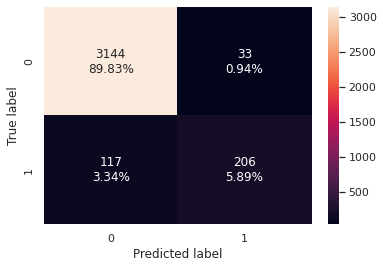

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.957143,0.637771,0.861925,0.733096


#### ROC-AUC

* ROC-AUC on training set

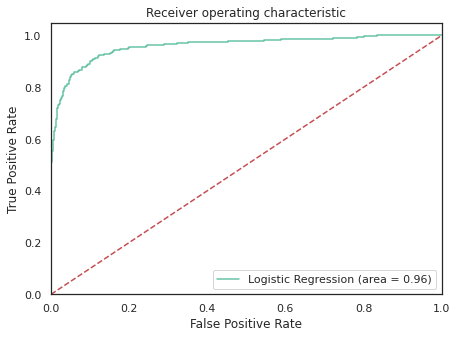

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set but the recall is low.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.09069231144436934


#### Checking model performance on training set

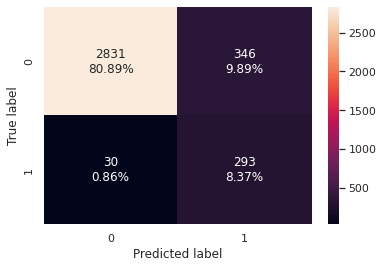

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance: Threshold :",optimal_threshold_auc_roc)
log_reg_model_train_perf_threshold_auc_roc

Training performance: Threshold : 0.09069231144436934


,Accuracy,Recall,Precision,F1
0,0.892571,0.907121,0.458529,0.609148


* Model performance has improved significantly on training set.
* Model is giving a recall of 0.86 on the training set.
* Precision and F1 scores are low.

#### Let's use Precision-Recall curve and see if we can find a better threshold

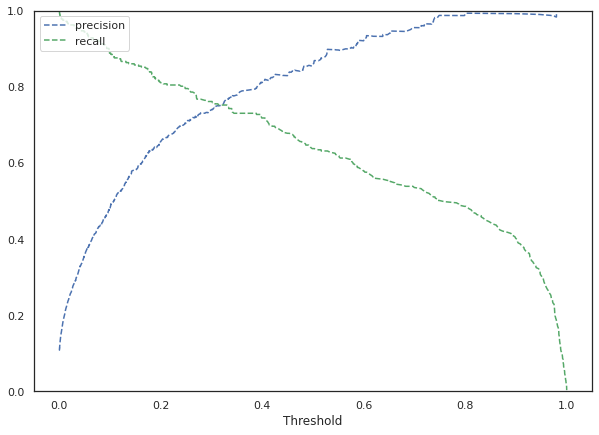

In [ ]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.37 we will get equal precision and recall but taking a step back and selecting value around 0.33 might provide a higher recall and a good precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.33

#### Checking model performance on training set

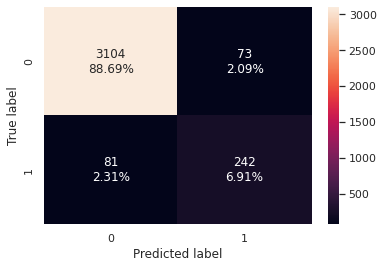

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance: Threshold:",optimal_threshold_curve)
log_reg_model_train_perf_threshold_curve

Training performance: Threshold: 0.33


,Accuracy,Recall,Precision,F1
0,0.956,0.749226,0.768254,0.758621


* Recall has decreased when compared to the previous model, Accuracy, Precision and F1 show improvement.
* Let us check the model with 0.37 as threshold.

### Model Performance Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.37 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.957143,0.892571,0.956000
Recall,0.637771,0.907121,0.749226
Precision,0.861925,0.458529,0.768254
F1,0.733096,0.609148,0.758621


* We want the recall score to be higher, so from this analysis it looks like Logistic Regression with .37 threshold shows a better performance with recall score of 0.92 and Accuracy of 0.93

### Let's check the performance on the test set

**Using the model with default threshold**

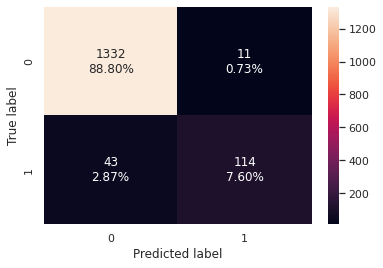

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.964,0.726115,0.912,0.808511


* ROC-AUC on test set

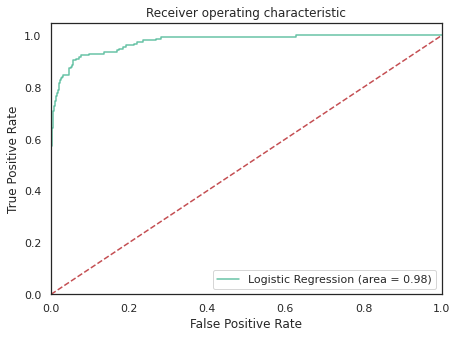

In [ ]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Using ROC curve

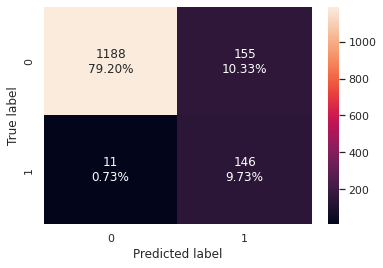

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance: using Threshold",optimal_threshold_auc_roc )
log_reg_model_test_perf_threshold_auc_roc

Test set performance: using Threshold 0.09069231144436934


,Accuracy,Recall,Precision,F1
0,0.889333,0.929936,0.48505,0.637555


**Using the model with threshold 0.33**

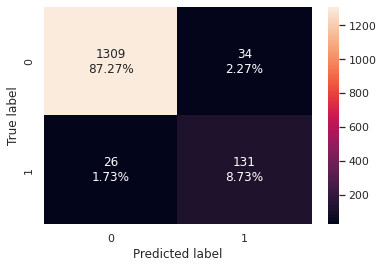

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test performance: using Threshold",optimal_threshold_curve)
log_reg_model_test_perf_threshold_curve

Test performance: using Threshold 0.33


,Accuracy,Recall,Precision,F1
0,0.96,0.834395,0.793939,0.813665


### Model performance comparison

**Insights:**

***True Positives:***

Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will take personal loan. Outcome: The model is good.

***True Negatives:***

Reality: A customer didn't wanted to take personal loan. 
Model Prediction: The customer will not take personal loan. Outcome: The business is unaffected .

***False Positives :***

Reality: A customer didn't want to take personal loan. 
Model Prediction: The customer will take personal loan. 
Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.

***False Negatives:***

Reality: A customer wanted to take personal Loan. 
Model Prediction: The customer will not take personal loan. 
Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers. If team knew about this customers, they could have offered some good APR /interest rates.

#### Training Score

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.37 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.957143,0.892571,0.956000
Recall,0.637771,0.907121,0.749226
Precision,0.861925,0.458529,0.768254
F1,0.733096,0.609148,0.758621


#### Test Score

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.37 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.964000,0.889333,0.960000
Recall,0.726115,0.929936,0.834395
Precision,0.912000,0.485050,0.793939
F1,0.808511,0.637555,0.813665


### Conclusion

* By changing the threshold of the logistic regression model we were able to see a significant improvement in the model performance.
* The model achieved a recall of 0.83 having high accuracy of .91 on the training set with threshold set at 0.37.

## Build Decision Tree Model

### Model evaluation criterion

### Model can make wrong predictions as:
 
1. Predicting a customer will not be behind on payments (Non-Delinquent) but in reality the customer would be behind on payments.

2. Predicting a customer will be behind on payments (Delinquent) but in reality the customer would not be behind on payments (Non-Delinquent). 


### Which case is more important? 

* If we predict a non-delinquent customer as a delinquent customer bank would lose an opportunity of providing loan to a potential customer.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


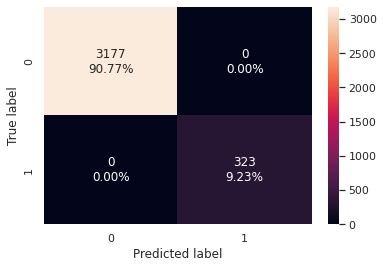

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

* We are using 'gini' criteria to split.
The decission will become the dominant class and the decision tree will become biased toward the dominant classes, since the frequencty of class 0 is 94% compared to class 1 with a frequency of 6%.

* To handle this imbalanced data set,we can set the class weight to balanced the decision tree will increase the weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

* Since not being able to identify a potential customer is the biggest loss as mentioned earlier with logistic regression. Hence, recall is the right metric to check the performance of the model.

#### Checking model performance on test set

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.984667,0.917197,0.935065,0.926045


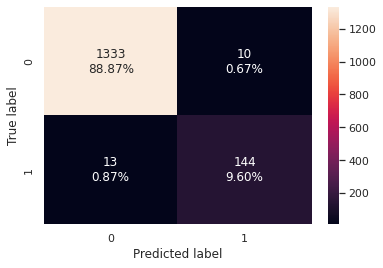

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

* Model is giving good and generalized results on training and test set.

## Visualizing the Decision Tree

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Experience', 'Income', 'CCAvg', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'EducationDesc_Professional', 'EducationDesc_Undergrad', 'FamilySize_Family 2', 'FamilySize_Family 3', 'FamilySize_Family 4', 'MortgageCat_200k', 'MortgageCat_400K', 'MortgageCat_600K', 'MortgageCat_Above 600K', 'MortgageCat_No Mortgage', 'Agebin_31-40', 'Agebin_41-50', 'Agebin_51-60', 'Agebin_60-100']


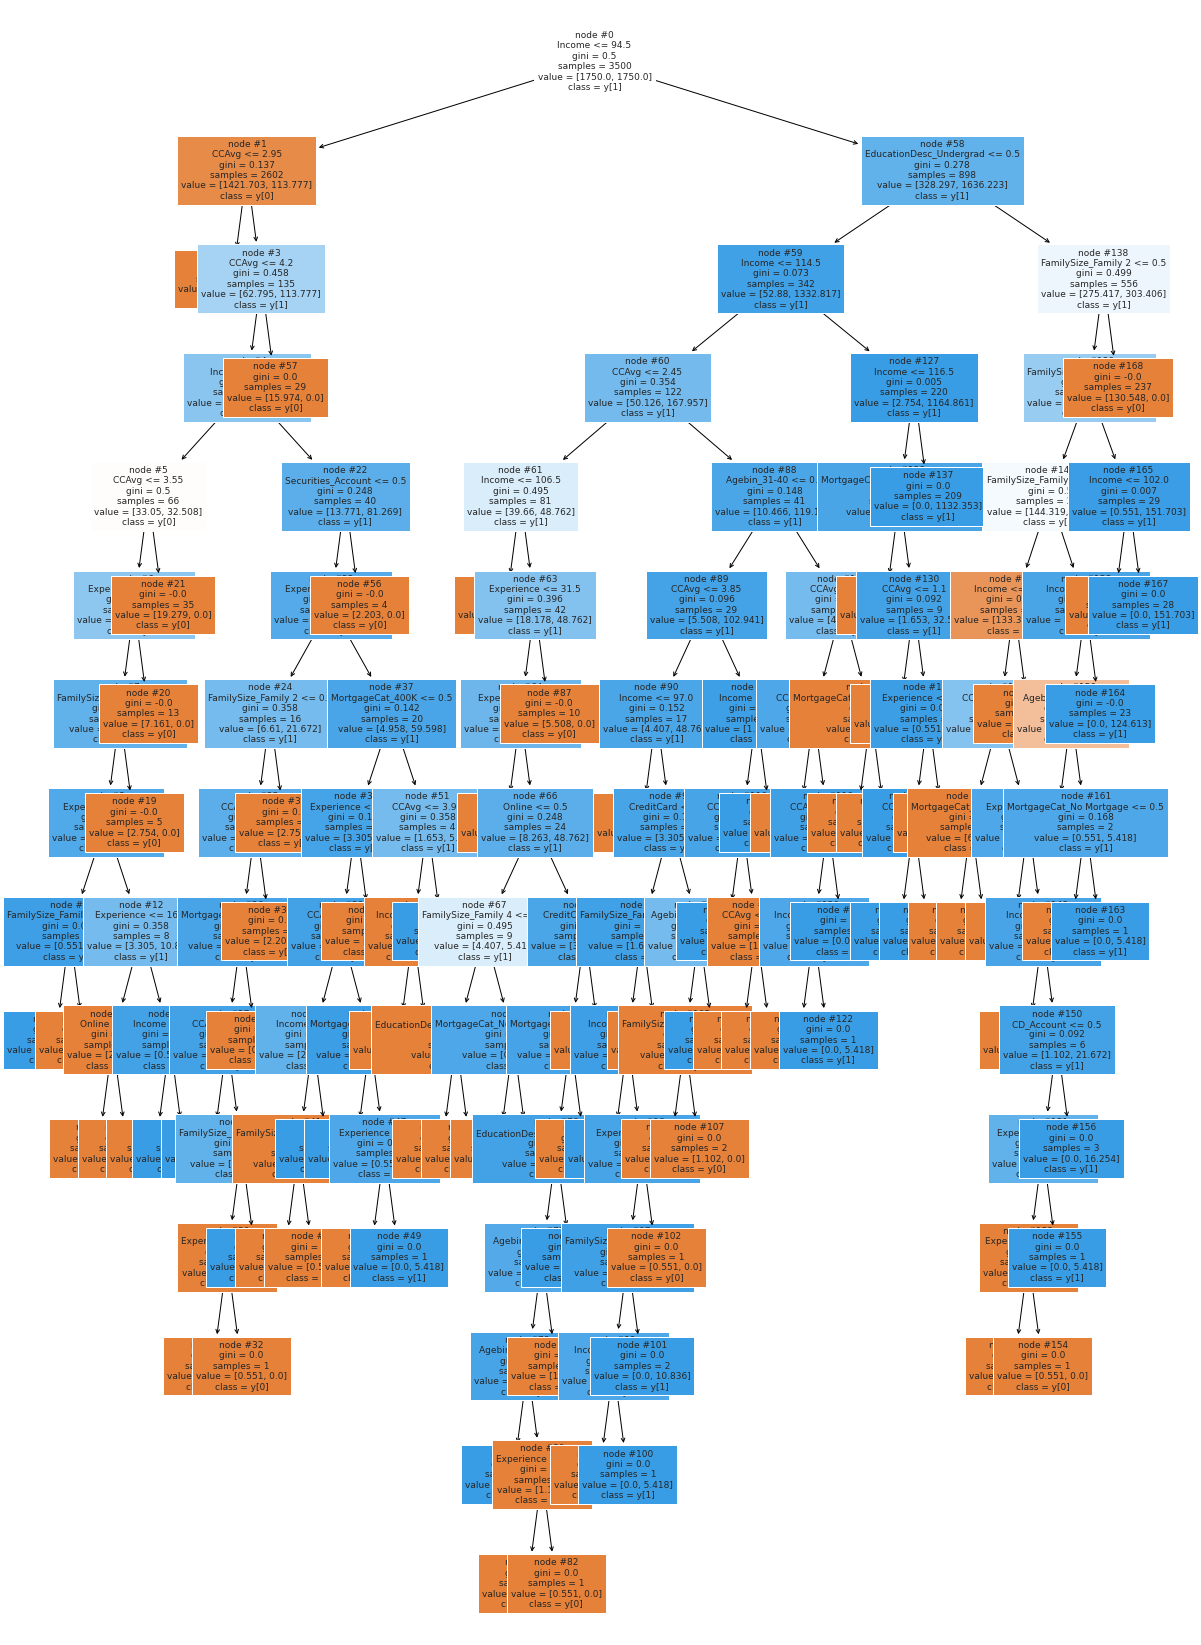

In [ ]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**The tree is overfit**

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 94.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1358.91, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.20
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |--- Experience <= 20.50
|   |   |   |   |   |   |--- FamilySize_Family 3 <= 0.50
|   |   |   |   |   |   |   |--- Experience <= 8.50
|   |   |   |   |   |   |   |   |--- FamilySize_Family 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 21.67] class: 1
|   |   |   |   |   |   |   |   |--- FamilySize_Family 4 >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |   |   |   |--- Experience >  8.50
|   |   |   |   |   |   |   |   |--- Experience <= 16.50
|   |   |   |   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.65, 0.00

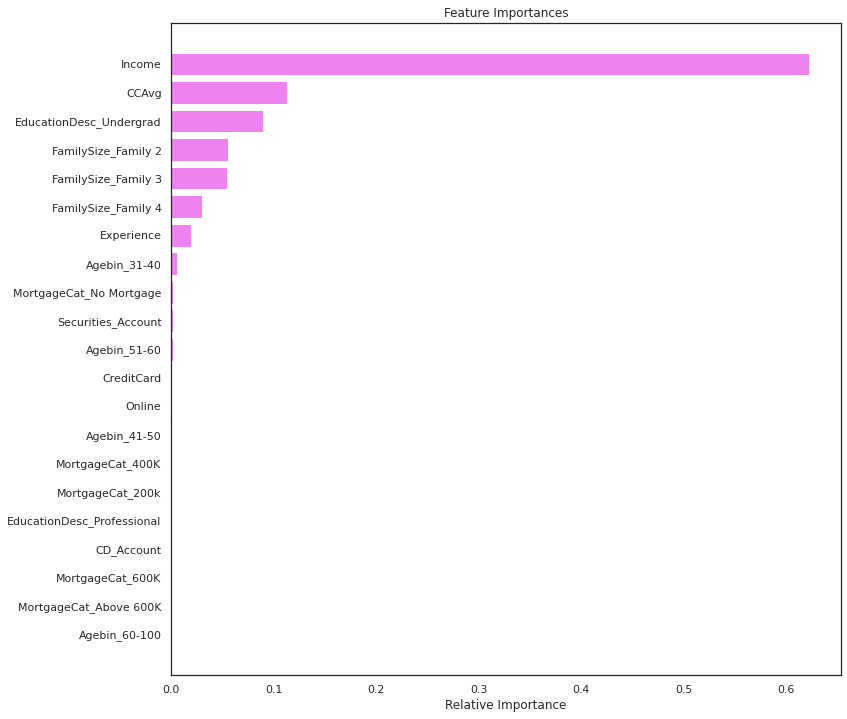

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Undergrad Eduction, Family size of 3 and above, CCAvg are the most important variables.

### Using GridSearch for Hyperparameter tuning of our tree model 
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
* Let's see if we can improve our model performance even more.

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=1e-06, random_state=1)

#### Checking performance on training set

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


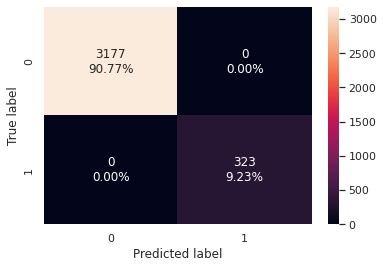

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* The Recall has improved on the training set as compared to the initial model.

#### Checking model performance on test set

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.89172,0.903226,0.897436


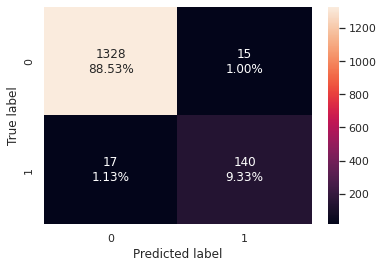

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model has performance has remained same and the model has become simpler.

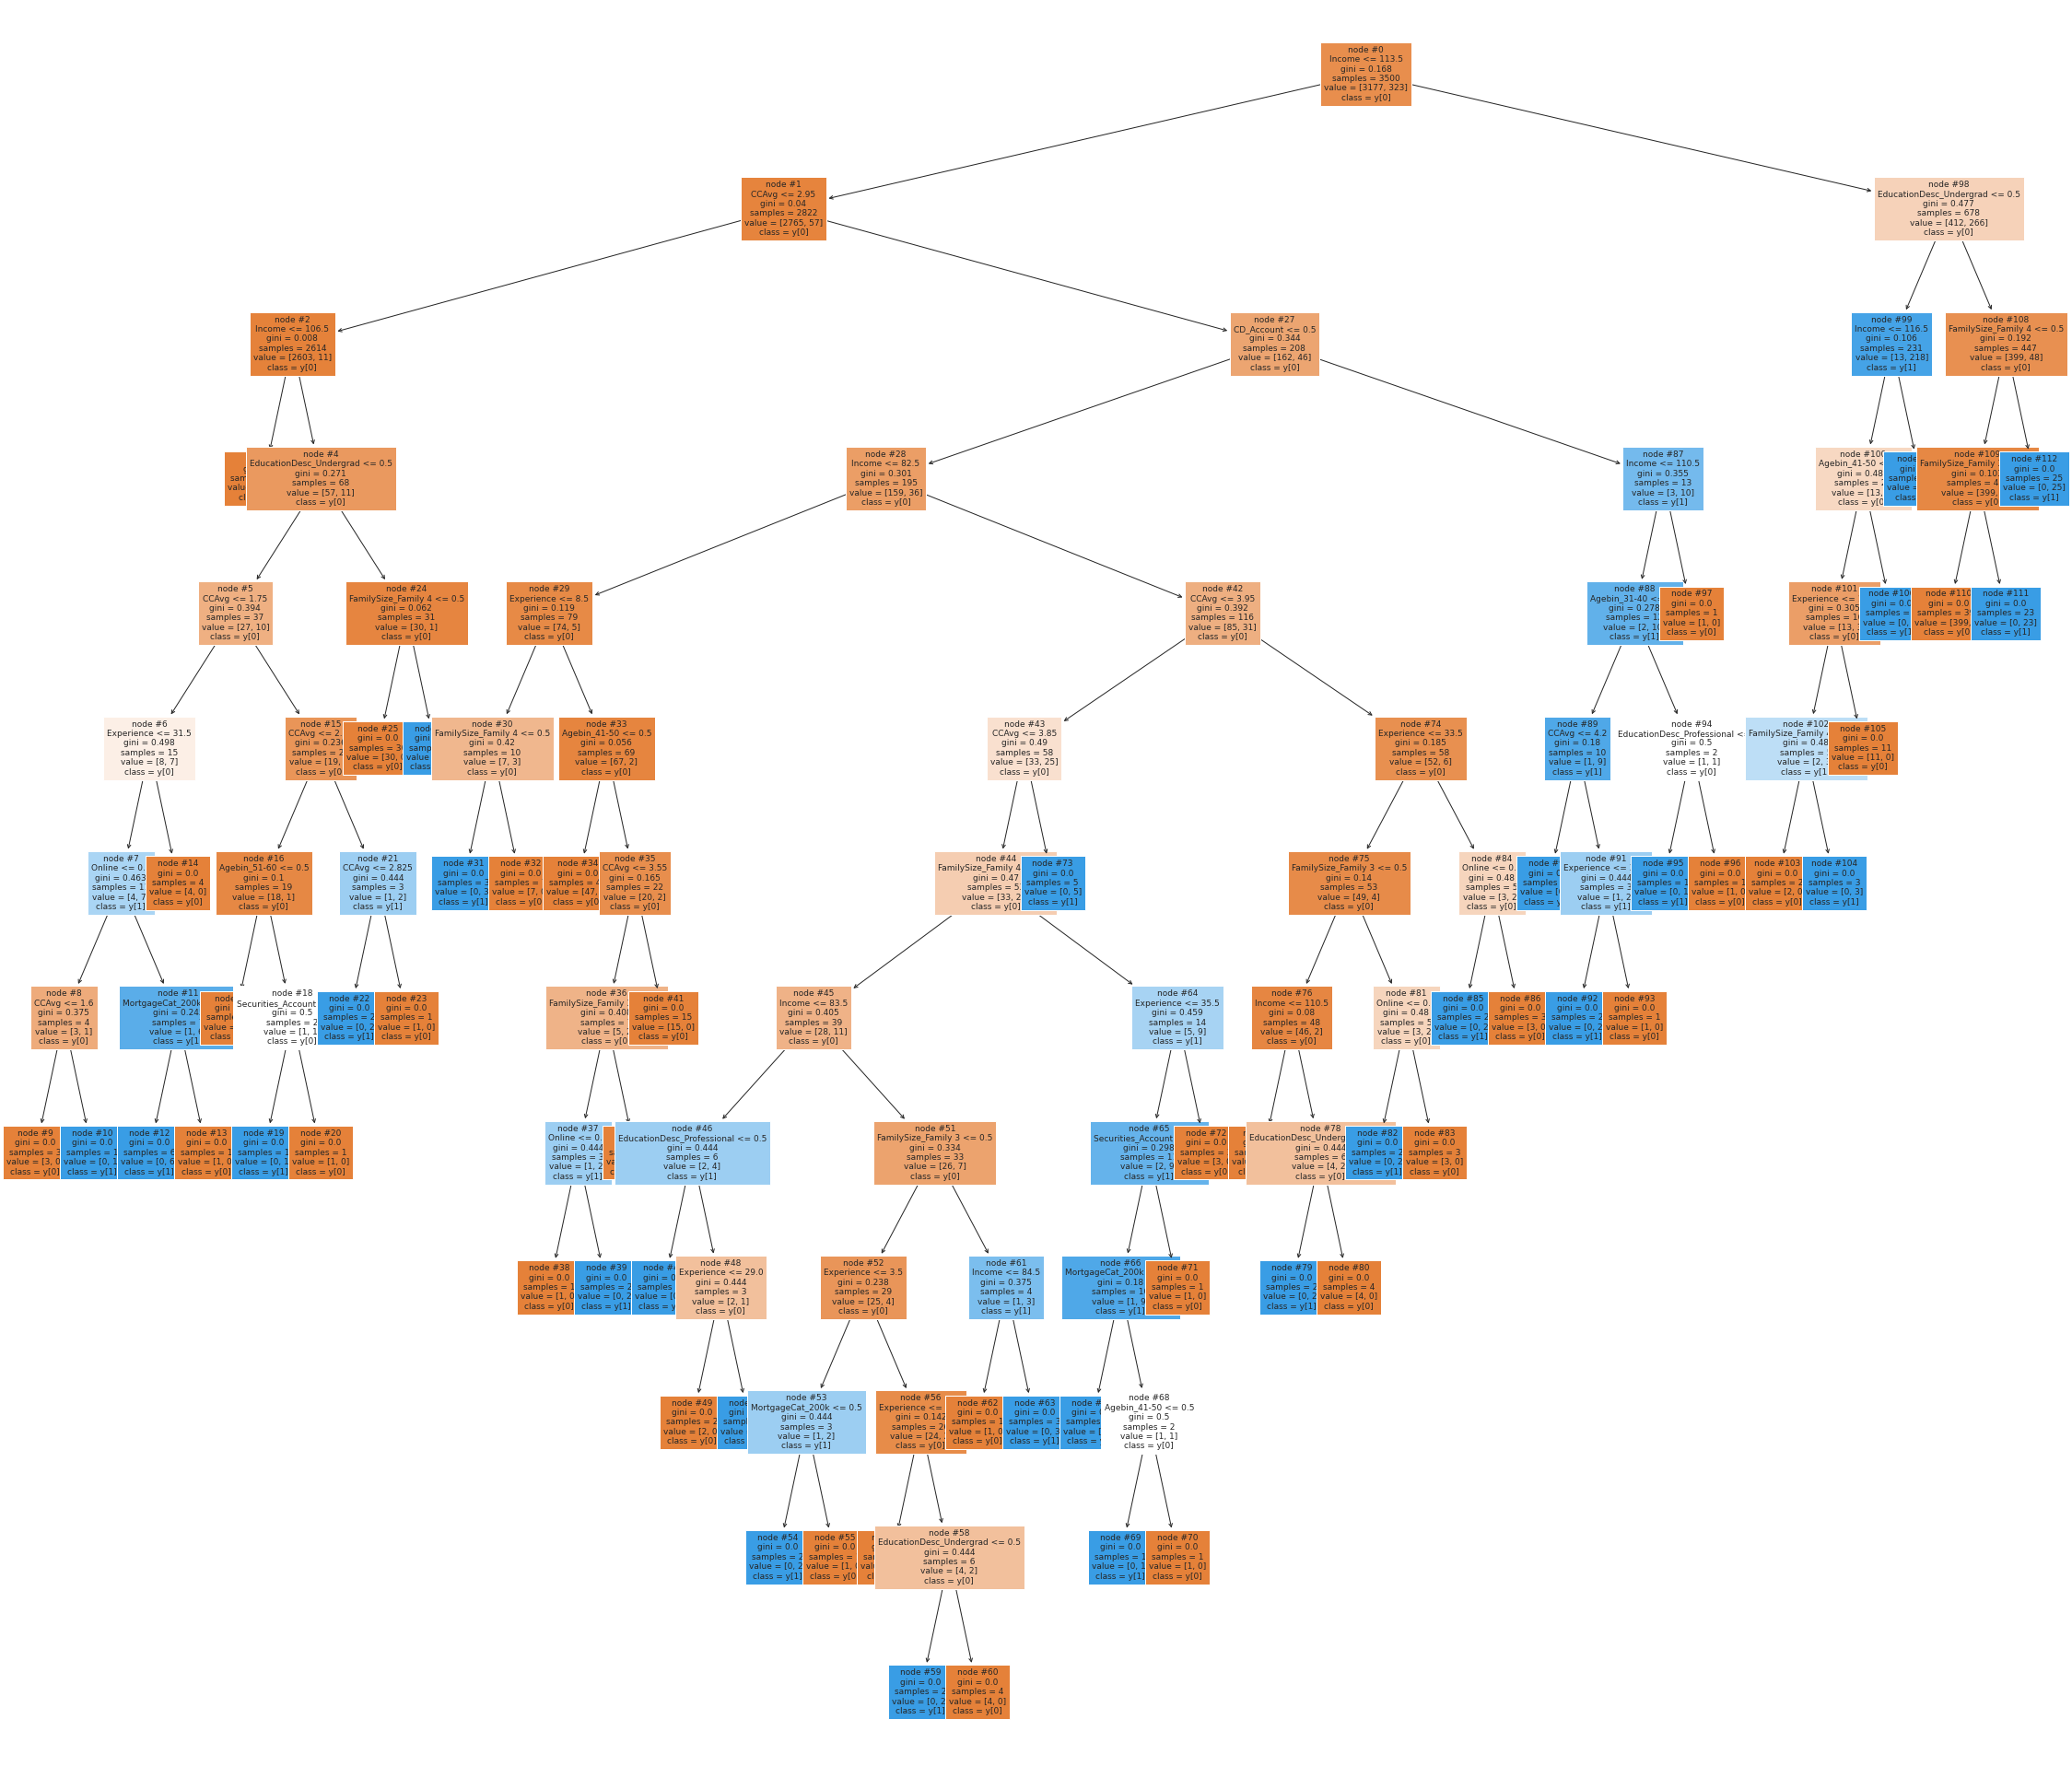

In [ ]:
plt.figure(figsize=(40, 35))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* The tree looks overfit, let us do some pruning and make the tree better.

## Cost Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000238,0.000952
2,0.000257,0.001467
3,0.000271,0.002008
4,0.000277,0.003118
5,0.000366,0.003484
6,0.000381,0.003865
7,0.000381,0.004627
8,0.000381,0.005008
9,0.000421,0.005429


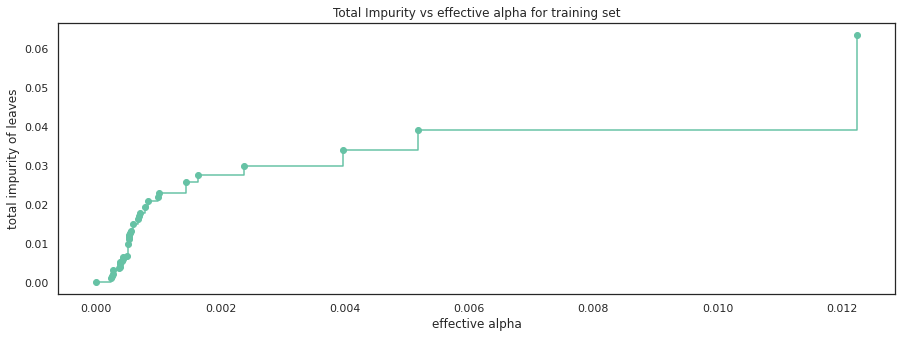

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05206542558865251



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

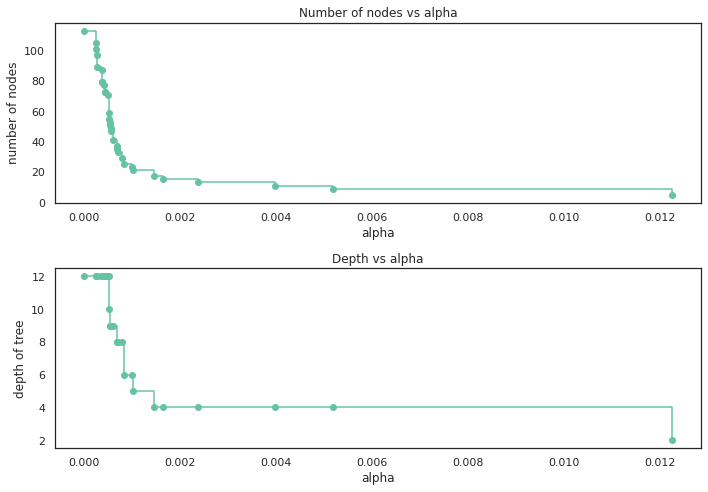

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

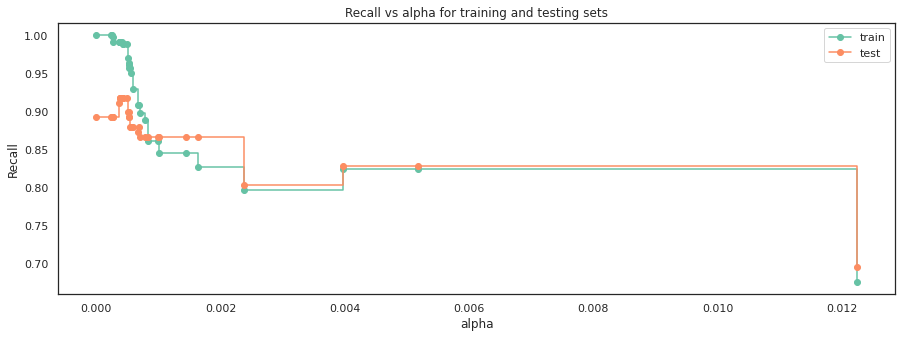

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0003809523809523809, random_state=1)


#### Checking model performance on training set

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.996857,0.990712,0.97561,0.983103


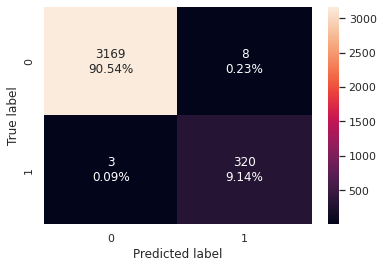

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### Checking model performance on test set

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.982,0.917197,0.911392,0.914286


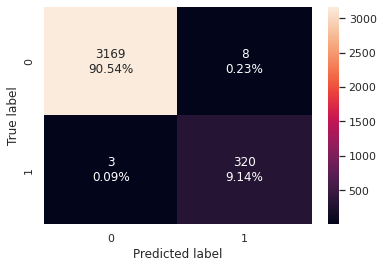

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.

## Visualizing the Decision Tree

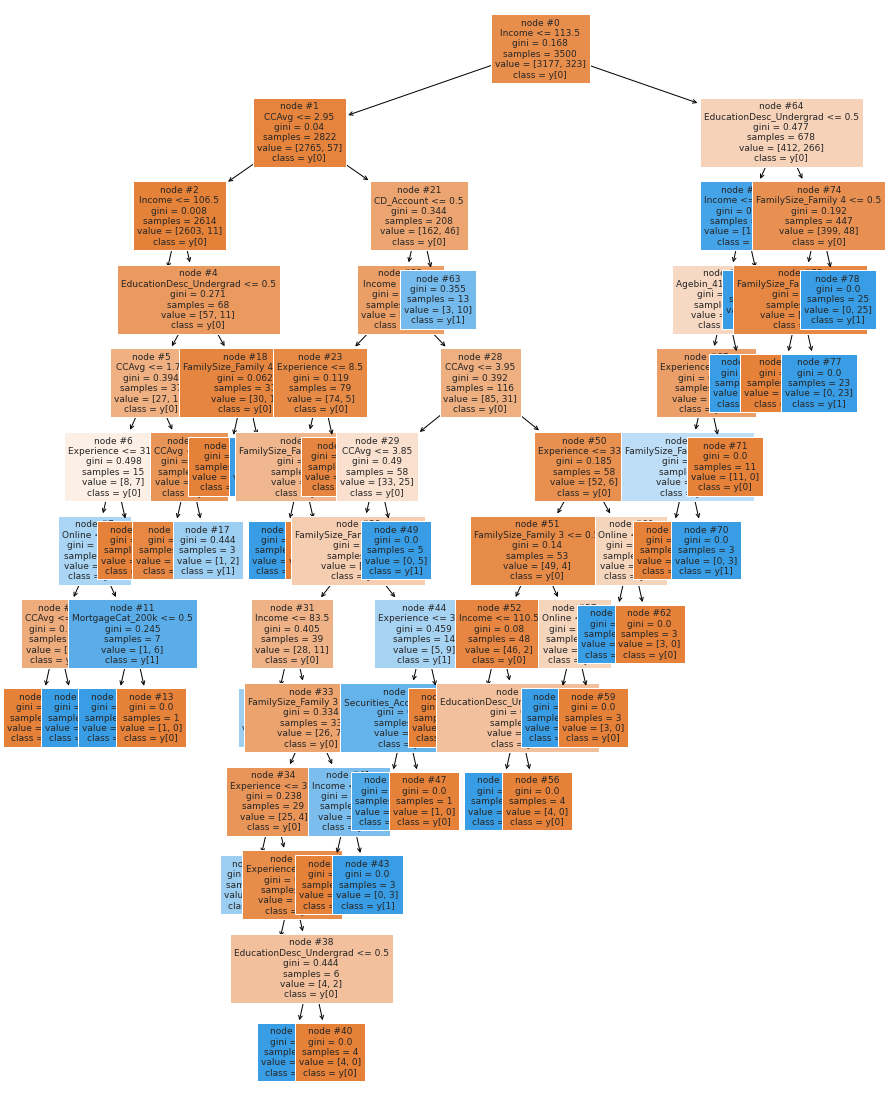

In [ ]:
plt.figure(figsize=(15, 20))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- EducationDesc_Undergrad <= 0.50
|   |   |   |   |--- CCAvg <= 1.75
|   |   |   |   |   |--- Experience <= 31.50
|   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 1.60
|   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  1.60
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |--- MortgageCat_200k <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |   |   |--- MortgageCat_200k >  0.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |--- Experience >  31.50
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |--- CCAvg >  1.75
|   |

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                 Imp
EducationDesc_Undergrad     0.387263
Income                      0.311936
FamilySize_Family 4         0.093901
FamilySize_Family 3         0.083131
CCAvg                       0.058543
Experience                  0.023114
CD_Account                  0.014645
Online                      0.011737
Agebin_41-50                0.010128
MortgageCat_200k            0.003014
Securities_Account          0.002589
CreditCard                  0.000000
EducationDesc_Professional  0.000000
FamilySize_Family 2         0.000000
MortgageCat_400K            0.000000
MortgageCat_600K            0.000000
MortgageCat_Above 600K      0.000000
MortgageCat_No Mortgage     0.000000
Agebin_31-40                0.000000
Agebin_51-60                0.000000
Agebin_60-100               0.000000


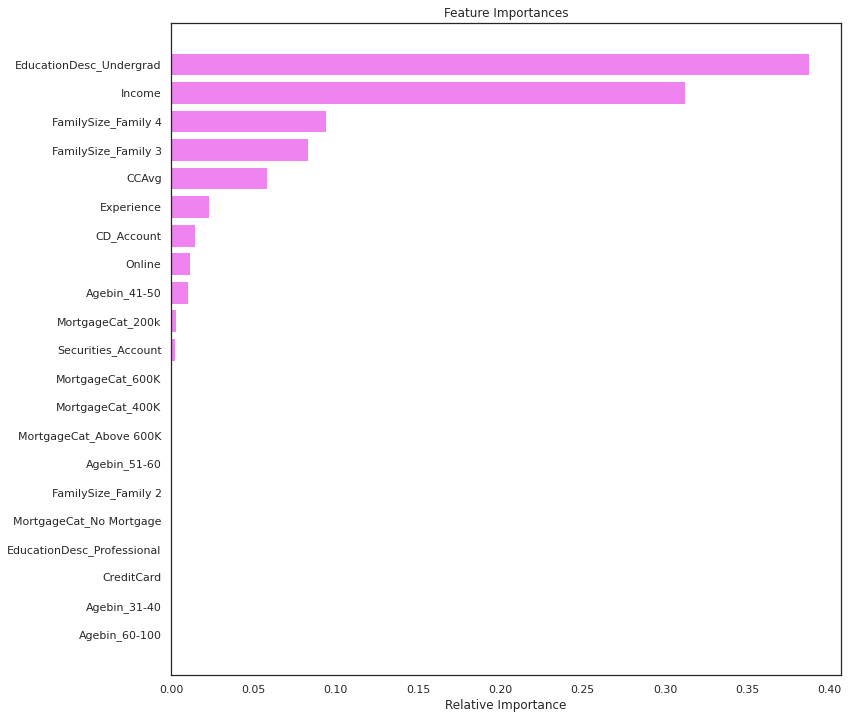

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Undergrad Education, Family size of 3 and above, CCVAvg and CDAccount remain the most important feature with post-pruning too.

## Comparing all the decision tree models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.996857
Recall,1.0,1.0,0.990712
Precision,1.0,1.0,0.975610
F1,1.0,1.0,0.983103


In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.984667,0.978667,0.982000
Recall,0.917197,0.891720,0.917197
Precision,0.935065,0.903226,0.911392
F1,0.926045,0.897436,0.914286


* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

# Comparing Logistic Regression Vs Decission Tree

In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.33 Threshold",
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]

print("Test set performance comparison:")
models_test_comp_df.T

Test set performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression sklearn,0.964000,0.726115,0.912000,0.808511
Logistic Regression-0.37 Threshold,0.889333,0.929936,0.485050,0.637555
Logistic Regression-0.33 Threshold,0.960000,0.834395,0.793939,0.813665
Decision Tree sklearn,0.984667,0.917197,0.935065,0.926045
Decision Tree (Pre-Pruning),0.978667,0.891720,0.903226,0.897436
Decision Tree (Post-Pruning),0.982000,0.917197,0.911392,0.914286


From this comparison table, we can see that Decision Tree post pruning gives a better Recall than the Logistic regression. It is a good idea to use Decision Tree for this model prediction.

In [ ]:
# to build linear regression_model
from sklearn.linear_model import LinearRegression
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train.unique()

array([0, 1])

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, X_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.22658,0.154888,0.387142,0.383441,inf


# Conclusion

* We analyzed the Personal Loan campaign data using EDA and by using different models like Logistic Regression and Decision Tree Classifier to build a likelihood of Customer buying Loan.
* First we built model using Logistic Regression and performance metric used was Recall. 
* The most important features for classification were Income,Education, CD account ,Family and CCAvg .
* Coefficient of Income, Graduate and Advanced Education, Family_3,Family 4,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
* Coefficient of Securities account,online ,Family_2 credit card are negative increase in these will lead to decrease in chances of a person borrowing a loan.
* We also improved the performance using ROC-AUC curve and optimal threshold, this was best model with high recall and accuracy .
* Decision tree can easily overfit. They require less datapreprocessing compared to logistic Regression and are easy to understand.
* We used decision trees with prepruning and post pruning. The Post pruning model gave 90% recall with 98% accuracy.
* Income, Customers with graduate degree, customers having 3 family members are some of the most important variables in predicting if the customers will purchase a personal loan.

# Recommendation

* Decision trees doesn't require to much data preparation or handling of outliers like logistic regression. They are easy to understand. 
* Decision tress can easily overfit , so we have to be careful using decision tree.
* Based on EDA: logistic Regression , Decision tree , Income ,Educatoin,Family,CCavg are most important factor.
* Customers who have income above 98k dollars , Advance/graduate level education, a family of more than 2, such customers have higher chances of taking personal loans.
So for this campaign we can group the customers into 3 different categories:
* Category 1 :-Higher income,Advanced/Graduate level education, 3 /4 Family members,high spending
* Category 2 :- Medium income group,Graduate level education. 3/4Family members,medium spending
* Category 3 :-Lower income group,undergrads ,3/4Family Member,low spending
Customer Average Spending and Mortages can also be looked upon as based on EDA and logistic Regression this parameters also play some role in likelihood of buy loan.

* We can 1st address Category 1 customers , by providing them with a personal relationship managers who can address there concerns and can pursue them to buy loan from the bank with acceptable interest rates.
* Look for opportunities in Category 2 customers.
   From the importance metrics we see that customers with Undergrad eduction are more likely to buy the personal loan, so we can also target this group of customers who have undergrad education and spend more. These customers may be looking for opprtunities for improvement. Prequalifying for Loan may be more attractive to them.
* Its also important to keep the customers living in Sanoma, Shasta, San Luis, Contra counties continue to buy personal loan, look for opprtunities with customers living in other counties where personal loan buying is low.